In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [246]:
# Exercise 1.1
I0 = 1
S0 = 999
R0 = 0

beta = 0.3
gamma = 0.1
mu = 0.05
t = 200

def gillespies_sir(t, S0, I0, R0, beta, gamma, mu):
    times = []
    S_list = []
    I_list = []
    R_list = []
    t0 = 0
    N = S0 + I0 + R0
    S = S0
    I = I0
    R = R0
    while t0 < t and (S + I + R) > 0:
        r_infect = beta * S * I / N
        r_birth = mu * N
        r_recover = gamma * I
        r_deathS = mu * S
        r_deathI = mu * I
        r_deathR = mu * R

        rate0 = r_infect + r_birth + r_recover + r_deathS + r_deathI + r_deathR

        if rate0 <= 0.0:
            break

        u1 = random.uniform(0, 1.0)
        dt = -math.log(u1) / rate0
        t0 += dt
        if t0 > t:
            break

        u2 = random.uniform(0, 1.0) * rate0
        if u2 < r_infect:
            if S > 0:
                S -= 1
                I += 1
        elif u2 < r_infect + r_birth:
            S += 1
        elif u2 < r_infect + r_birth + r_recover:
            if I > 0:
                I -= 1
                R += 1
        elif u2 < r_infect + r_birth + r_recover + r_deathS:
            if S > 0:
                S -= 1
        elif u2 < r_infect + r_birth + r_recover + r_deathS + r_deathI:
            if I > 0:
                I -= 1
        else:
            if R > 0:
                R -= 1   

        times.append(t0)
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)

    return times, S_list, I_list, R_list



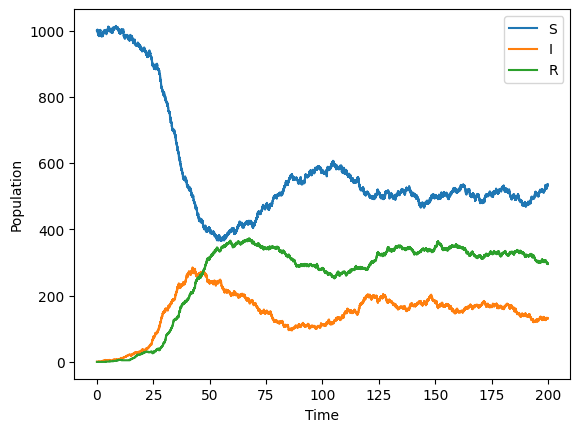

In [260]:
times, S_list, I_list, R_list = gillespies_sir(t, S0, I0, R0, beta, gamma, mu)

plt.step(times, S_list, where='post', label='S')
plt.step(times, I_list, where='post', label='I')
plt.step(times, R_list, where='post', label='R')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()